In [365]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [366]:
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

from sklearn.preprocessing import minmax_scale

In [367]:
from sklearn.metrics import plot_roc_curve

In [368]:
train_dataset = pd.read_csv('/Users/nikitaseleznev/Downloads/train.csv', sep=',')

In [369]:
test_dataset = pd.read_csv('/Users/nikitaseleznev/Downloads/test.csv', sep=',')

In [370]:
test_dataset.head()

,id,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


In [371]:
train_dataset.head()

,id,url,title,target
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",False
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,False
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,False
3,3,colorbox.spb.ru,Не Беси Меня Картинки,False
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,False


In [372]:
print(train_dataset.shape)
print(test_dataset.shape)

(135309, 4)
(165378, 3)


In [373]:
f_names=['url', 'title']
f_names

['url', 'title']

In [374]:
train_dataset.isna().mean()

id        0.0
url       0.0
title     0.0
target    0.0
dtype: float64

In [375]:
X_1_train_raw = train_dataset['url']
X_2_train_raw = train_dataset['title']
y = train_dataset['target'].astype(int).values
X_1_test_raw = test_dataset['url']
X_2_test_raw = test_dataset['title']

In [376]:
train_dataset['target'].value_counts()

False    118594
True      16715
Name: target, dtype: int64

In [377]:
print(len(X_1_train_possible))
print(len(X_1_test_possible))

135309
165378


In [378]:
model = LogisticRegression(max_iter=150)

In [379]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [380]:
df_train = pd.DataFrame({'url':X_1_train_raw, 'title':X_2_train_raw})
df_test = pd.DataFrame({'url':X_1_test_raw, 'title':X_2_test_raw})
df_train['merged'] = df_train['url'] + ' ' + df_train['title']
df_test['merged'] =  df_test['url'] + ' ' + df_test['title']
X_train_prep = vectorizer.fit_transform(df_train['merged'].values)
X_test_prep = vectorizer.transform(df_test['merged'].values)

In [381]:
model.fit(X_train_prep, y)
y_pr = model.predict(X_train_prep)
print(f1_score(y, y_pr))
roc_auc_score(y_score=y_pr, y_true=y)

0.9908898944193062


0.9912488670791699

In [382]:
scores = model.predict_proba(X_train_prep)[:,1]
scores

array([2.29438635e-04, 8.85598435e-04, 2.42573834e-03, ...,
       3.11063183e-02, 7.93171367e-05, 1.20688799e-04])

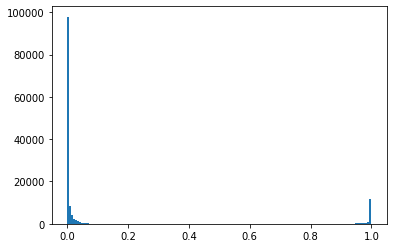

In [383]:
plt.hist(scores, bins=150)
plt.show()

In [384]:
f1_array = []
ths = np.linspace(0, 1, 100)
for th in ths:
    bin_score = (scores > th).astype(int)
    f1_array.append(f1_score(y_true=y, y_pred=bin_score))
ths[np.argmax(f1_array)]

0.29292929292929293

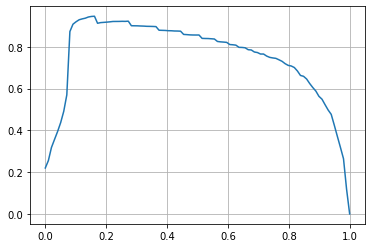

In [385]:
plt.plot(ths, f1_array1)
plt.grid()
plt.show()

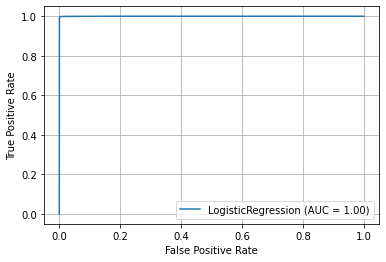

In [386]:
plot_roc_curve(y=y, X=X_train_prep, estimator=model)
plt.grid()

In [387]:
model.predict(X_test_prep)

array([0, 0, 0, ..., 0, 0, 0])

In [388]:
np.unique(model.predict(X_test_prep))

array([0, 1])

In [389]:
test_dataset["target"] = model.predict(X_test_prep).astype(bool)

test_dataset[["id", "target"]].to_csv("selnik02", index=False)

!cat selnik02.csv | head

cat: selnik02.csv: No such file or directory
